<a href="https://colab.research.google.com/github/TakumiML/obento/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://qiita.com/takapy0210/items/834558aa182e3cf6a8b4

# 1. データの準備

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR # 線形回帰のモデル
%matplotlib inline

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boxed_lunch/train.csv') # 学習データの読み込み
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boxed_lunch/test.csv') # 検証データの読み込み
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boxed_lunch/sample.csv', header=None) # 提出用サンプルデータの読み込み

# データ確認
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [ ]:
train['week'].value_counts()
#> 水    43
#> 木    43
#> 火    41
#> 金    41
#> 月    39


week
水    43
木    43
火    41
金    41
月    39
Name: count, dtype: int64

In [ ]:
# 説明変数として使用する week と temperature をダミー変数化しながら X_trainに設定
X_train = pd.get_dummies(train[['week', 'temperature']])

X_train.head()


,temperature,week_月,week_木,week_水,week_火,week_金
0,19.8,True,False,False,False,False
1,17.0,False,False,False,True,False
2,15.5,False,False,True,False,False
3,15.2,False,True,False,False,False
4,16.1,False,False,False,False,True


In [ ]:
y_train = train['y']


# 2. モデルの準備

In [ ]:
# モデルの定義
model = LR()


# 3. モデルの作成

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
model.coef_ #傾き
# > array([-2.53878074,  8.26339936, -9.47240196, -2.02873774,  1.85251984, 1.38522051])

array([-2.53878074,  8.26339936, -9.47240196, -2.02873774,  1.85251984,
        1.38522051])

In [ ]:
model.intercept_ #切片
# > 135.69119841401601

135.69119841401601

# 4. 予測

In [ ]:
# 検証用データ
X_test = pd.get_dummies(test[['week', 'temperature']])

# 予測
pred = model.predict(X_test)
print(pred)
# > [ 82.37908978  65.54193684  64.21341177  89.37081192  81.43666396
# >   74.5088695   69.09622987  70.81424168  69.5043945   94.05748117
# >   78.99747474  78.68446197  83.27773815  86.26034736  94.31135925
# >   88.89871962  89.60121914  86.32427504  89.05300617  83.90235823
# >   76.45869401  89.34734106  89.56076232  93.04196888  77.4742063
# >   86.0469261   90.13244614 100.22364142  97.10401806  76.71257208
# >   96.96368327 107.65003323  96.66934838  95.83462769  99.56159871
# >   99.24858594 108.60161785 110.30567789  87.88320732  98.23307364]

[ 82.37908978  65.54193684  64.21341177  89.37081192  81.43666396
  74.5088695   69.09622987  70.81424168  69.5043945   94.05748117
  78.99747474  78.68446197  83.27773815  86.26034736  94.31135925
  88.89871962  89.60121914  86.32427504  89.05300617  83.90235823
  76.45869401  89.34734106  89.56076232  93.04196888  77.4742063
  86.0469261   90.13244614 100.22364142  97.10401806  76.71257208
  96.96368327 107.65003323  96.66934838  95.83462769  99.56159871
  99.24858594 108.60161785 110.30567789  87.88320732  98.23307364]


# 5. 評価

In [ ]:
sample[1] = pred
sample.to_csv('submit3.csv', index=None, header=None)


# 重回帰分析（説明変数を年と月で）


# 1. データの準備

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR # 線形回帰のモデル
%matplotlib inline

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boxed_lunch/train.csv') # 学習データの読み込み
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boxed_lunch/test.csv') # 検証データの読み込み
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boxed_lunch/sample.csv', header=None) # 提出用サンプルデータの読み込み

<Axes: >

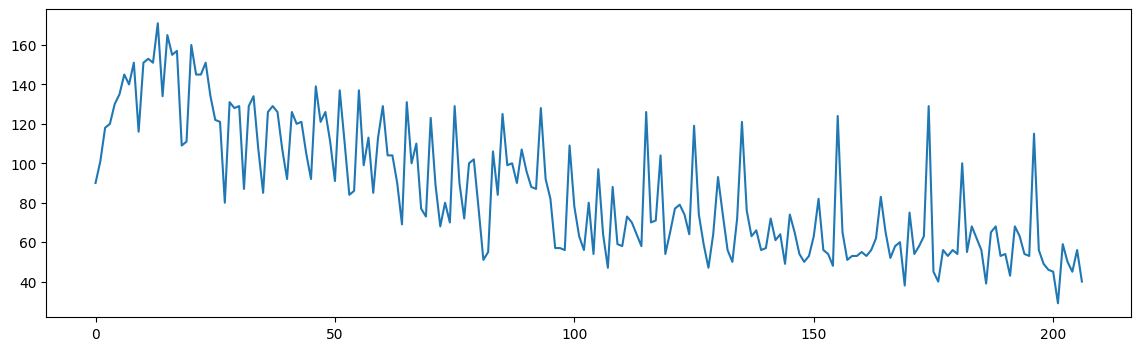

In [ ]:
train['y'].plot(figsize=(14,4))

In [ ]:
# datetimeを分割して設定
train['year'] = train['datetime'].apply(lambda x : x.split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split('-')[1])
test['year'] = test['datetime'].apply(lambda x : x.split('-')[0])
test['month'] = test['datetime'].apply(lambda x : x.split('-')[1])

# 新規で定義したカラムのデータ型はobject型になってしまうため、int型へ変換する
train['yaer'] = train['year'].astype(np.int64)
train['month'] = train['month'].astype(np.int64)
test['yaer'] = test['year'].astype(np.int64)
test['month'] = test['month'].astype(np.int64)

In [ ]:
X_train = train[['year', 'month']]
X_test = test[['year', 'month']]
y_train = train['y']

# 2. モデルの準備

In [ ]:
# モデルの定義
model1 = LR()


# 3. モデルの作成

In [ ]:
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
model1.coef_ #傾き
# > array([-104.0107109 ,   -7.41004428])

array([-104.0107109 ,   -7.41004428])

In [ ]:
model1.intercept_ #切片
# > 209594.15656370917

209594.15656370905

# 4. 予測

In [ ]:
pred = model1.predict(X_test)

# 5. 評価

In [ ]:
sample[1] = pred
sample.to_csv('submit4.csv', index=None, header=None)

# 予測と実際のデータを比較

In [ ]:
pred = model1.predict(X_train)

# predをtrainの新たなカラムpredとして代入
train['pred'] = pred
train.head()


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer,pred
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,2013,139.085028
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,2013,139.085028
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11,2013,139.085028
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11,2013,139.085028
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11,2013,139.085028


In [ ]:
# trainのyとpredを引き算した結果をtrainの新たなカラムresとして代入
train['res'] = train['y'] - train['pred']

# ソートして中身を確認
train.sort_values(by='res')

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer,pred,res
27,2013-12-26,80,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3,2013,12,2013,131.674984,-51.674984
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,2013,139.085028,-49.085028
81,2014-3-26,51,水,0,肉団子クリームシチュー,392.0,NaN,NaN,NaN,曇,--,18.7,2014,3,2014,94.354672,-43.354672
82,2014-3-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4,2014,3,2014,94.354672,-39.354672
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,2013,139.085028,-38.085028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2014-5-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,23.8,2014,5,2014,79.534583,46.465417
135,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,2014,6,2014,72.124539,48.875461
155,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,2014,7,2014,64.714495,59.285505
196,2014-9-12,115,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,27.3,2014,9,2014,49.894406,65.105594


In [ ]:
# 関数
def jisaku1(x):
    if x == 'お楽しみメニュー':
        return 1
    else:
        return 0

train['fun'] = train['remarks'].apply(lambda x : jisaku1(x))
test['fun'] = test['remarks'].apply(lambda x : jisaku1(x))


In [ ]:
train.sort_values(by='fun', ascending=False)[:10]
train.sort_values(by='fun', ascending=True)[:10]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer,pred,res,fun
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,2013,139.085028,-49.085028,0
128,2014-6-4,47,水,0,たっぷりベーコンフライ,424.0,NaN,NaN,NaN,晴れ,--,27.5,2014,6,2014,72.124539,-25.124539,0
129,2014-6-5,64,木,1,鶏の味噌漬け焼き,405.0,NaN,NaN,NaN,雨,0,21.5,2014,6,2014,72.124539,-8.124539,0
130,2014-6-6,93,金,0,手作りロースカツ,430.0,NaN,NaN,NaN,雨,6.5,19.9,2014,6,2014,72.124539,20.875461,0
131,2014-6-9,74,月,1,牛肉ニンニクの芽炒め,417.0,NaN,NaN,NaN,雨,0,25.0,2014,6,2014,72.124539,1.875461,0
132,2014-6-10,56,火,0,カレイ唐揚げ野菜餡かけ,426.0,NaN,NaN,1.0,曇,--,25.5,2014,6,2014,72.124539,-16.124539,0
133,2014-6-11,50,水,1,チャプチェ,413.0,NaN,NaN,NaN,雨,2.5,22.3,2014,6,2014,72.124539,-22.124539,0
134,2014-6-12,72,木,1,タンドリーチキン,440.0,NaN,NaN,NaN,雨,0.5,21.3,2014,6,2014,72.124539,-0.124539,0
136,2014-6-16,76,月,1,牛すき焼き風,440.0,NaN,NaN,NaN,薄曇,--,28.1,2014,6,2014,72.124539,3.875461,0
137,2014-6-17,63,火,0,ポークソテー韓国ソース,427.0,NaN,NaN,NaN,薄曇,--,27.6,2014,6,2014,72.124539,-9.124539,0


In [ ]:
X_train = train[['year', 'month', 'fun', 'temperature']]
X_test = test[['year', 'month', 'fun', 'temperature']]

model2 = LR()

model2.fit(X_train, y_train)




LinearRegression()

In [ ]:
X_train

,year,month,fun,temperature
0,2013,11,0,19.8
1,2013,11,0,17.0
2,2013,11,0,15.5
3,2013,11,0,15.2
4,2013,11,0,16.1
...,...,...,...,...
202,2014,9,0,24.8
203,2014,9,0,25.4
204,2014,9,0,27.1
205,2014,9,0,26.6


In [ ]:
model2.coef_ #傾き
# > array([-104.0107109 ,   -7.41004428])

array([-76.3765687 ,  -4.20489757,  44.63348171,  -1.25463854])

In [ ]:
pred2 = model2.predict(X_test)
sample[1] = pred2
sample.to_csv('submit5.csv', index=None, header=None)

In [ ]:
len(pred2)

40

In [ ]:
test

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer,fun
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2,2014,10,2014,0
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9,2014,10,2014,0
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7,2014,10,2014,0
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5,2014,10,2014,0
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1,2014,10,2014,0
5,2014-10-8,水,0,完熟トマトのホットカレー,420.0,NaN,NaN,NaN,晴れ,--,23.3,2014,10,2014,0
6,2014-10-9,木,0,豚キムチ炒め,435.0,NaN,キャリアアップ支援セミナー,NaN,曇,--,22.5,2014,10,2014,0
7,2014-10-10,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,1.0,薄曇,--,26.1,2014,10,2014,1
8,2014-10-14,火,0,若鶏梅肉包揚げ,408.0,NaN,NaN,NaN,快晴,--,26.8,2014,10,2014,0
9,2014-10-15,水,1,ミックスグリル,450.0,料理長のこだわりメニュー,NaN,NaN,雨,1.5,15.6,2014,10,2014,0


In [ ]:
X_train = train[['year', 'month','week','weather', 'fun', 'temperature']]
X_test = test[['year', 'month','week','weather', 'fun', 'temperature']]

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
X_test

,month,fun,temperature,week_木,week_水,week_火,week_金,weather_晴れ,weather_曇,weather_薄曇,weather_雨
0,10,0,20.2,False,True,False,False,False,False,False,True
1,10,0,23.9,True,False,False,False,False,True,False,False
2,10,0,28.7,False,False,False,True,True,False,False,False
3,10,0,21.5,False,False,False,False,False,False,False,True
4,10,0,22.1,False,False,True,False,True,False,False,False
5,10,0,23.3,False,True,False,False,True,False,False,False
6,10,0,22.5,True,False,False,False,False,True,False,False
7,10,1,26.1,False,False,False,True,False,False,True,False
8,10,0,26.8,False,False,True,False,False,False,False,False
9,10,0,15.6,False,True,False,False,False,False,False,True


In [ ]:
X_train

,month,fun,temperature,year_2014,week_木,week_水,week_火,week_金,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電
0,11,0,19.8,False,False,False,False,False,False,False,False,False,False,False
1,11,0,17.0,False,False,False,True,False,False,False,False,False,False,False
2,11,0,15.5,False,False,True,False,False,False,False,False,False,False,False
3,11,0,15.2,False,True,False,False,False,False,False,False,False,False,False
4,11,0,16.1,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,9,0,24.8,True,False,True,False,False,False,True,False,False,False,False
203,9,0,25.4,True,True,False,False,False,False,True,False,False,False,False
204,9,0,27.1,True,False,False,False,True,True,False,False,False,False,False
205,9,0,26.6,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.tree import DecisionTreeClassifier               # import
tree = DecisionTreeClassifier(max_depth=100, random_state=42)    # 深さ5のモデルの用意
tree.fit(X_train, y_train)                                    # 学習用データで学習

DecisionTreeClassifier(max_depth=100, random_state=42)

In [ ]:
tree.score(X_train, y_train)

0.9951690821256038

In [ ]:
X_test['year_2014'] = True
X_test['weather_雷電'] = False
X_test['weather_雪'] = False

In [ ]:
X_test = X_test.reindex(columns=X_train.columns.values.tolist())

In [ ]:
X_test

,month,fun,temperature,year_2014,week_木,week_水,week_火,week_金,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電
0,10,0,20.2,True,False,True,False,False,False,False,False,True,False,False
1,10,0,23.9,True,True,False,False,False,False,True,False,False,False,False
2,10,0,28.7,True,False,False,False,True,True,False,False,False,False,False
3,10,0,21.5,True,False,False,False,False,False,False,False,True,False,False
4,10,0,22.1,True,False,False,True,False,True,False,False,False,False,False
5,10,0,23.3,True,False,True,False,False,True,False,False,False,False,False
6,10,0,22.5,True,True,False,False,False,False,True,False,False,False,False
7,10,1,26.1,True,False,False,False,True,False,False,True,False,False,False
8,10,0,26.8,True,False,False,True,False,False,False,False,False,False,False
9,10,0,15.6,True,False,True,False,False,False,False,False,True,False,False


In [ ]:
y_pred = tree.predict(X_test)       # test_dに対して予測

In [ ]:
y_pred

array([ 62,  46, 115,  82,  63,  29,  53,  45,  68, 118, 120,  45,  65,
        68, 118, 120, 130,  68,  68,  62,  29, 130, 145, 135,  62,  45,
        62, 135, 135,  62, 130, 151, 101, 118, 165, 130, 122, 121, 120,
       130])

In [ ]:
sample[1] = y_pred
sample.to_csv('submit9.csv', index=None, header=None)